## Systems "in control" and "out of control".
Mathematically control is all about the poles.  If the real part of all the poles are on the left hand side of the complex plane (less than zero), then the system is in control.  The system can be in control even if the poles are complex, as long as the real part is less than zero.  A system is out of control if any pole has a real part that is equal to or greater than zero.

## What does being in control really mean?

A system is in control if you input a step function and the system's output eventually settles to a constant value.  (Sometimes an underdamped system can take "too long" to settle to a constant value and this situation informally known as being out of control.) 

## Example 4 system not in control
$H(s)=\frac{10}{s^2+10s-10}$

 

<Axes: xlabel='Re(s)', ylabel='Im(s)'>

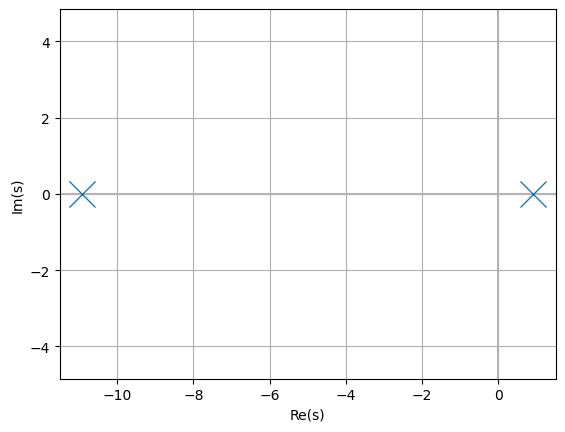

In [1]:
from lcapy import s, j, pi, f, transfer, j2pif,t,exp
import numpy as np
from matplotlib.pyplot import savefig
H=transfer(10/(s**2+10*s-10)).simplify()
H.plot()

We see one poles are near -11 and and one near 1, since at least one pole is not in the left hand plane it is out of control.

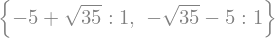

In [2]:
#The poles are given by:
H.poles()

(<Axes: xlabel='$\\omega (r/s)$', ylabel='Magnitude(dB)'>,
 <Axes: xlabel='$\\omega (r/s)$', ylabel='Transfer function phase (radians)'>)

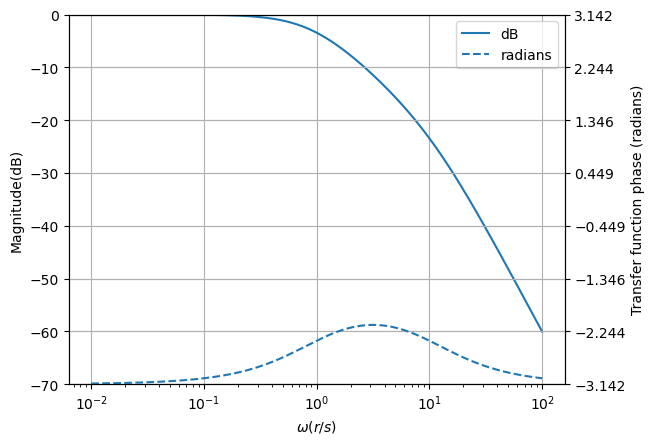

In [3]:
A = H.subs(j * f)
fv = np.logspace(-2, 2, 400)
A.plot(fv, log_frequency=True,ylabel="Magnitude(dB)",xlabel='$\omega (r/s)$')

This looks like a regular low pass filter, but notice the phase goes from $-\pi up to a higher value and back to $-\pi$  This means the system will exponentially increase until something burns out or it hist a physical limit not modeled by the transfer function.

<Axes: xlabel='Time (s)', ylabel='Signal Voltage(V)'>

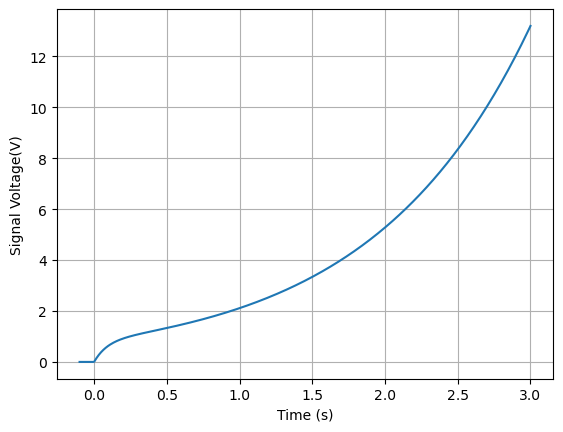

In [11]:
tv = np.linspace(-.1, 3, 400)
G=1/s 
F=H*G
ft=F(t, causal=True)
ft.plot(tv,ylabel='Signal Voltage(V)')

The step response is exponentially increasing, therefore it is out of control.

<Axes: xlabel='Time (s)', ylabel='Signal Voltage(V)'>

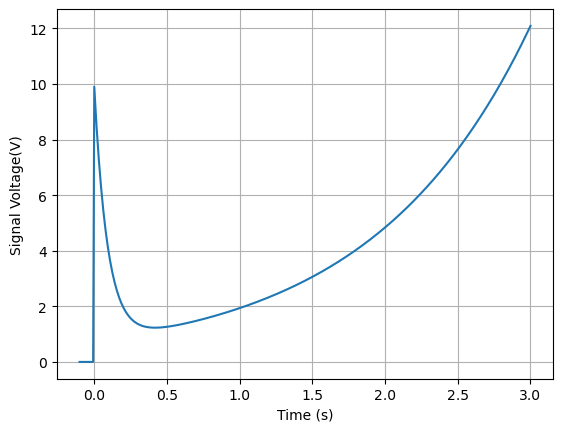

In [12]:
ht=H(t, causal=True)
ht.plot(tv,ylabel='Signal Voltage(V)')

The impulse response is exponentially increasing, therefore it is out of control.

## Extra Example

$H(s)=\frac{10s}{s^2+10s-10}$

<Axes: xlabel='Re(s)', ylabel='Im(s)'>

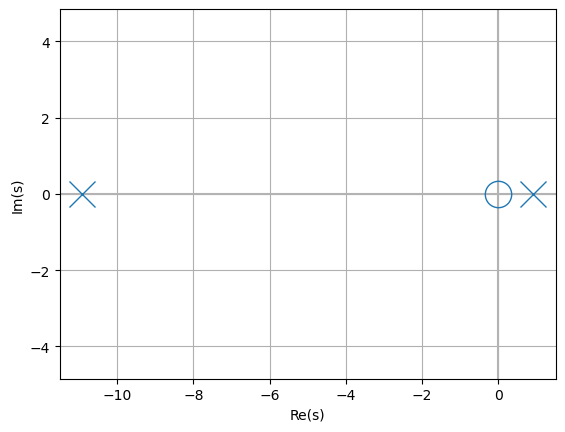

In [13]:
H=transfer(10*s/(s**2+10*s-10)).simplify()
H.plot()


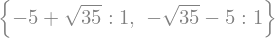

In [14]:
H.poles()

(<Axes: xlabel='$\\omega (r/s)$', ylabel='Magnitude(dB)'>,
 <Axes: xlabel='$\\omega (r/s)$', ylabel='Transfer function phase (radians)'>)

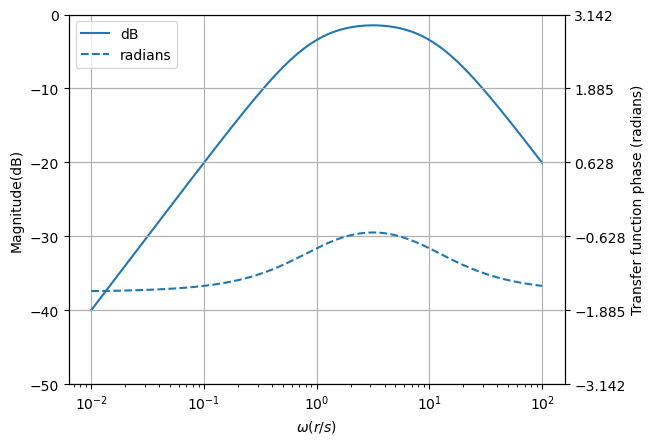

In [15]:
A = H.subs(j * f)
fv = np.logspace(-2, 2, 400)
A.plot(fv, log_frequency=True,ylabel="Magnitude(dB)",xlabel='$\omega (r/s)$')

<Axes: xlabel='Time (s)', ylabel='Signal Voltage(V)'>

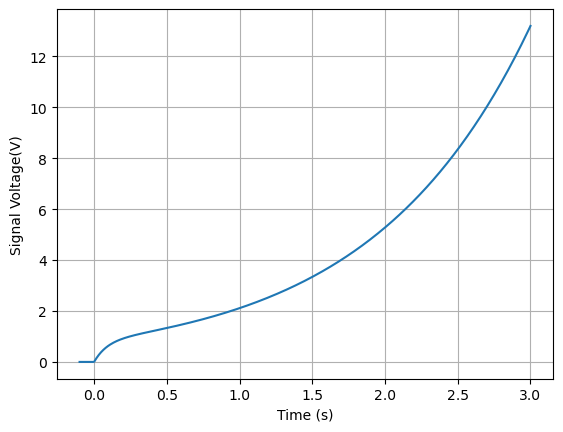

In [16]:
F=H*G
ft=F(t, causal=True)
ft.plot(tv,ylabel='Signal Voltage(V)')

<Axes: xlabel='Time (s)', ylabel='Signal Voltage(V)'>

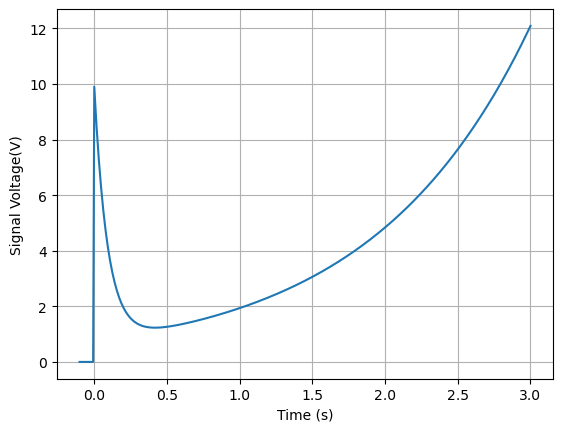

In [17]:
ht=H(t, causal=True)
ht.plot(tv,ylabel='Signal Voltage(V)')